<a href="https://colab.research.google.com/github/C4st3ll4n/google_colab/blob/master/polinomial_imovel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#Importando libs necesárias
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import  PolynomialFeatures
from sklearn.model_selection import  ShuffleSplit
import operator

In [6]:
#Carregando datasets
X, y = datasets.load_boston(return_X_y=True)

In [7]:
X = X[:, np.newaxis, 12]

In [9]:
#dividir em treino e test
ss = ShuffleSplit(n_splits=1, test_size=.25)
train_idx, test_idx = list(ss.split(X))[0]

In [10]:
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

In [11]:
regressor = linear_model.LinearRegression()
regressor.fit(X_poly[train_idx], y[train_idx])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
y_pred = regressor.predict(X_poly[test_idx])

In [21]:
info = {
    "coeficientes": regressor.coef_,
    "MSE":mean_squared_error(y[test_idx], y_pred)
}
print(info)

{'coeficientes': array([ 0.        , -2.39839592,  0.04522208]), 'MSE': 31.92648208181156}


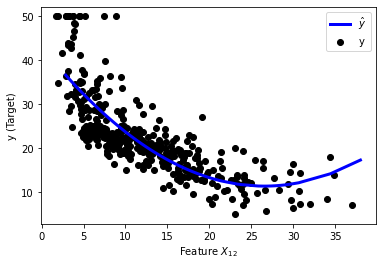

In [22]:
# Plotando resultados
plt.scatter(X[train_idx], y[train_idx], color='black', label='y')
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X[test_idx],y_pred), key=sort_axis)
X_test, y_pred = zip(*sorted_zip)
plt.plot(X_test, y_pred, color='blue', linewidth=3, label=r'$\hat{y}$')
plt.xlabel(r'Feature $X_{12}$')
plt.ylabel('y (Target)')
plt.legend()
plt.show()